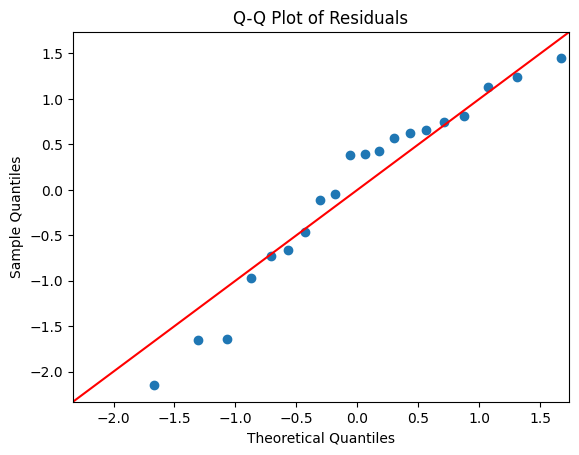

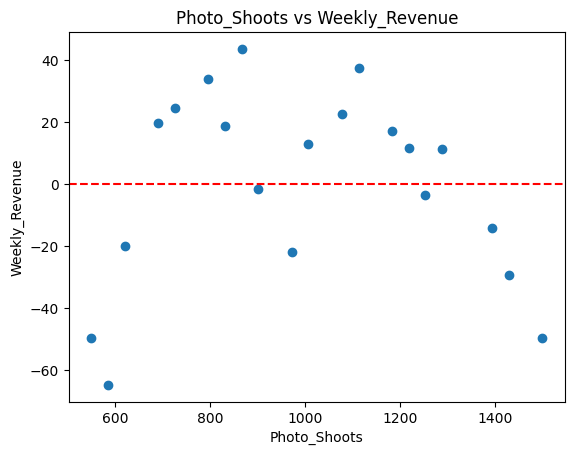

In [2]:
# Kernel Python (Pyodide)
#import and patch libraries for web use
import pyodide_http
pyodide_http.patch_all

# packages with micropip
import micropip
await micropip.install("openpyxl")

#import pandas
import pandas as pd
#matplotlib library for plotting (I)
import matplotlib.pyplot as plt
#the statsmodels libraty for statistical modeling (II)
import statsmodels.api as sm

# file with data
excel_file = pd.ExcelFile("practice_residual_plots.xlsx", engine='openpyxl')

data = pd.read_excel(excel_file)

#print the DataFrame to display the data
#print(data)

# (II) The Simple Linear Regression Model

#define the response (Y) and explanatory (X) variables
x = data['Photo_Shoots']
y = data['Weekly_Revenue']

#add a constant to the explanatory variable
x = sm.add_constant(x)

#build the linear regression model using the Ordinary Least Squares (OLS) method.
model = sm.OLS(y, x).fit()

#print the coefficients of the model and R-squared output
#print(model.summary())

# obtain the residual from the model
# residual - difference between the observed value and the predicted value
residuals = model.resid
# extract the fitted value (predicted values) from the model
fitted_values = model.fittedvalues

# print the residual
#print(residuals)
# Create a Q-Q plot of the residuals with a 45-degree reference line
sm.qqplot(residuals, line='45', fit=True)
# Add a title to the Q-Q plot
plt.title('Q-Q Plot of Residuals')
# Display the Q-Q plot
plt.show()


# extract the fitted values (predicted values)
fitted_values = model.fittedvalues

# Create Residual vs. Fitted Values plot
# Create a scatter plot of the fitted values against the residuals
plt.scatter (fitted_values, residuals)
# Add a horizontal reference line at y=0 (red dashes line)
plt.axhline (y=0, color='r', linestyle='--')
# Label the x-axis as 'Fitted Values'
plt.xlabel('Photo_Shoots')
# Label the y-axis as 'Residuals'
plt.ylabel('Weekly_Revenue')
# Add a title to the plot
plt.title('Photo_Shoots vs Weekly_Revenue')
plt.show()

The plott shows all the points along the reference line, which is why we can assume that the residuals are normally distributed.